# 03. Pytorh计算机视觉
计算机视觉是教计算机看见的艺术。

例如构建一个模型来分类一张照片是猫还是狗（二元分类）。

或者一张照片是猫、狗还是鸡（多类分类）。

或识别汽车在视频帧中的出现位置（目标检测）。

或者弄清楚图像中不同对象可以如何分离（全景分割）。

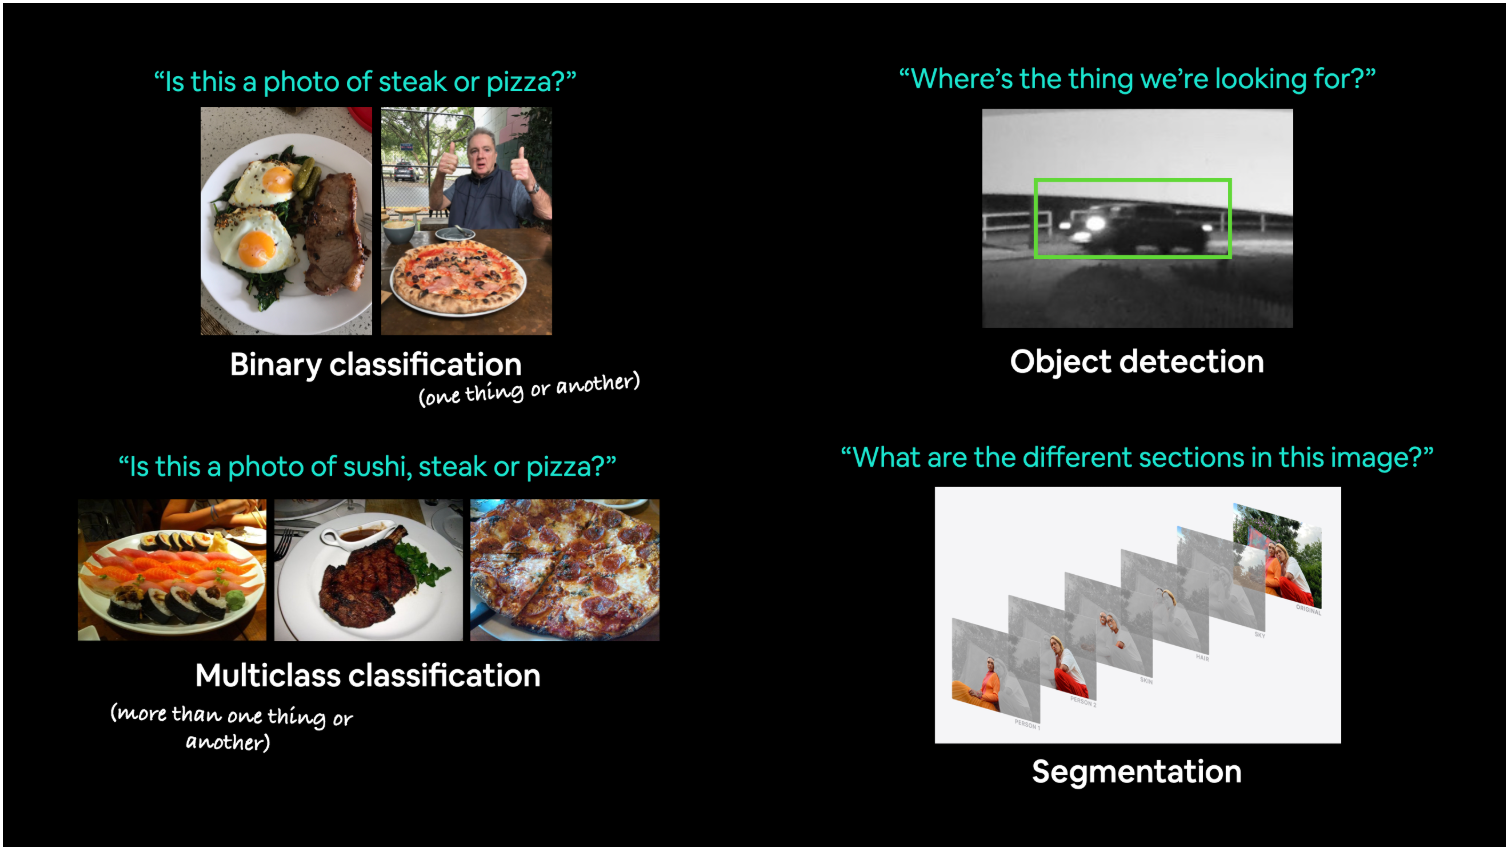

## CV在哪里被使用
如果你使用智能手机，你已经使用过计算机视觉。

相机和照片应用使用计算机视觉来增强和排序图像。

现代汽车使用计算机视觉来避开其他汽车并保持在车道线内。

制造商使用计算机视觉来识别各种产品中的缺陷。

安全摄像头使用计算机视觉来检测潜在入侵者。

本质上，任何可以用视觉方式描述的事物都可能是一个潜在的计算机视觉问题。

## 我们将要覆盖的内容
我们将把在过去几节中学习的 PyTorch 工作流程应用于计算机视觉。

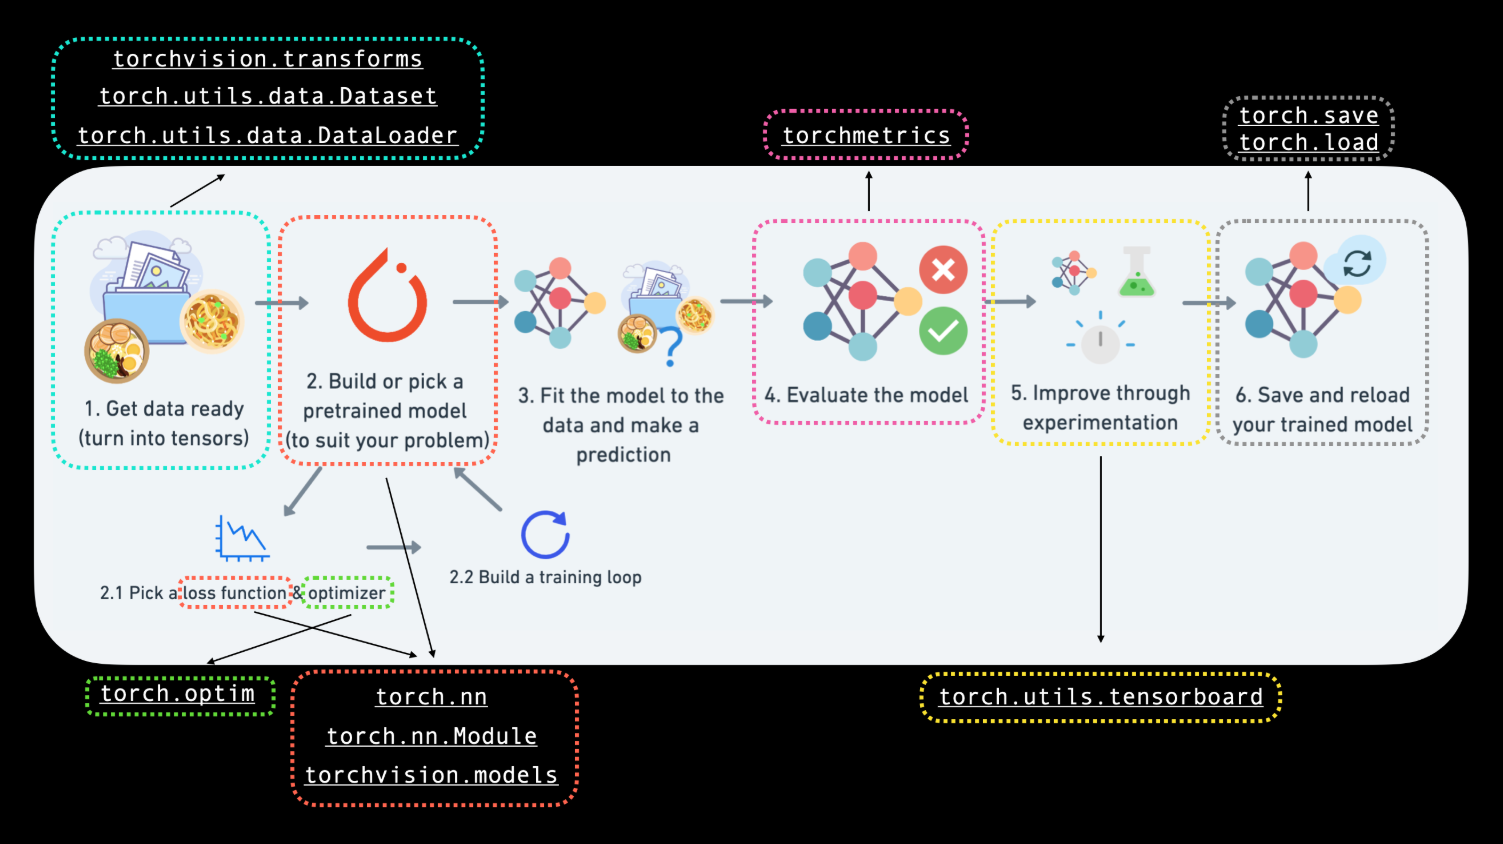

具体来说，将涵盖：

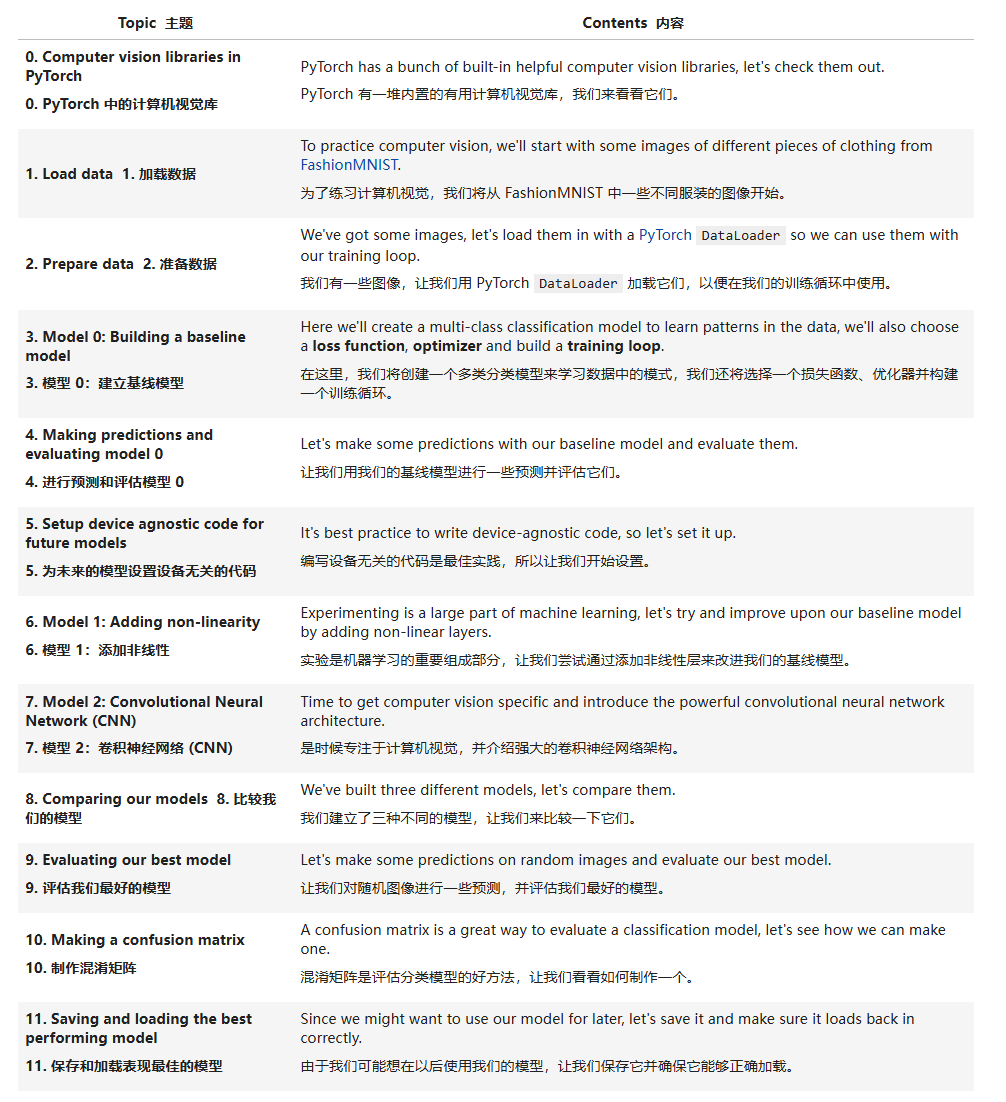

## 0.PyTorch中的计算机视觉库
在我们开始编写代码之前，先谈谈一些你应该了解的 PyTorch 计算机视觉库。

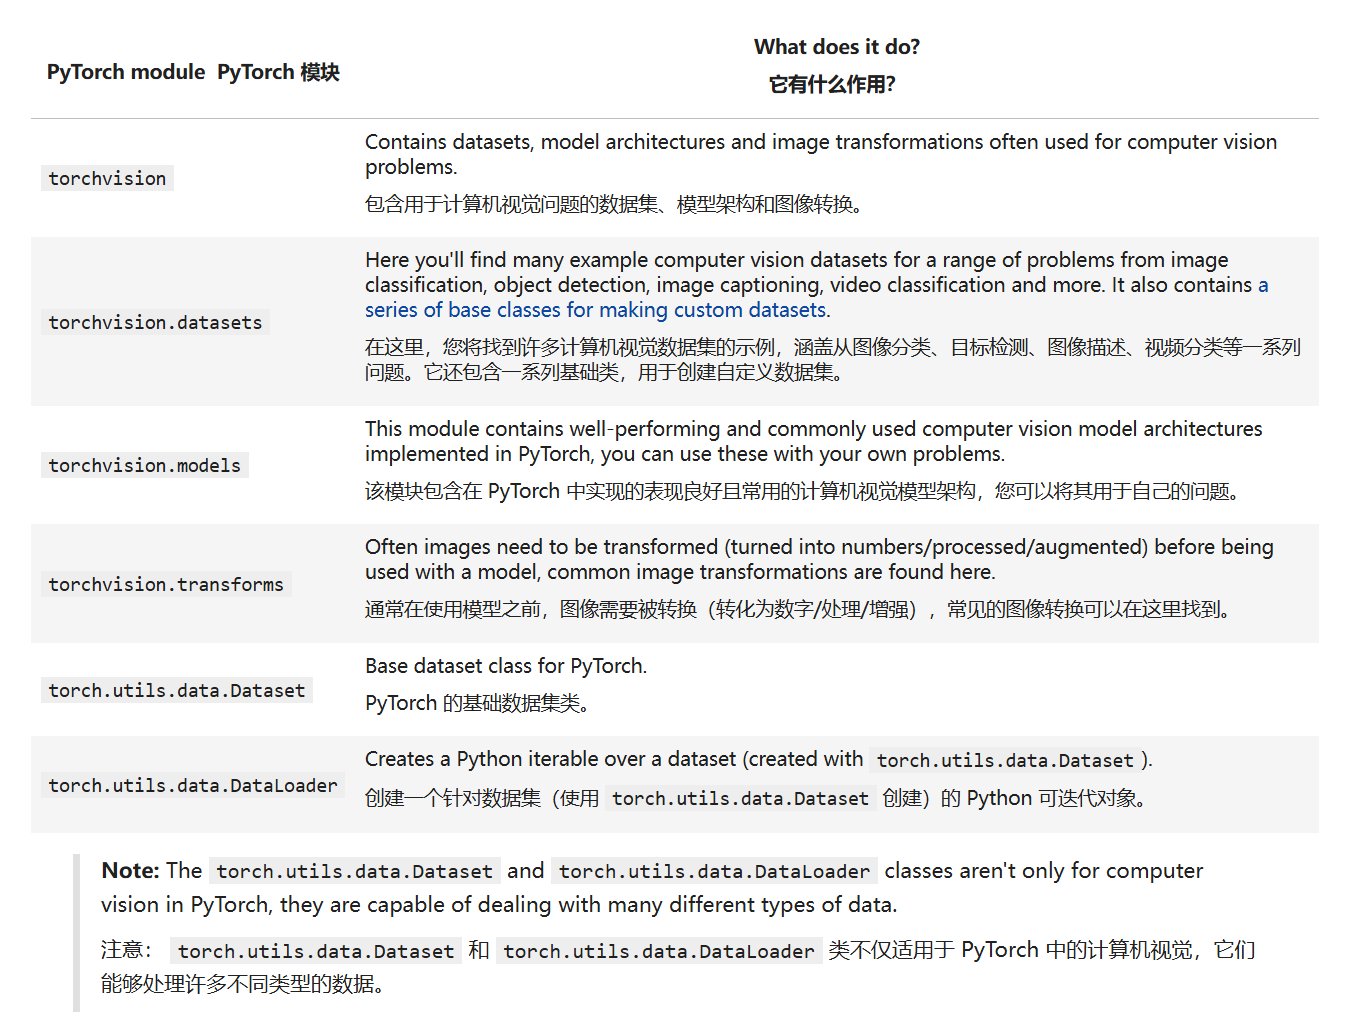

介绍完一些最重要的PyTorch计算机视觉库，接下来导入相关的依赖项。

In [1]:
# Import torch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.3.1+cu118
torchvision version: 0.18.1+cu118


## 1. 获取数据集
要开始处理计算机视觉问题，我们先获取一个计算机视觉数据集。

我们将从 FashionMNIST 开始。

原始的 MNIST 数据集包含数千个手写数字（从 0 到 9）的示例，并用于构建计算机视觉模型以识别邮政服务中的数字。

FashionMNIST，由 Zalando Research 制作，是一个类似的设置。

除了它包含 10 种不同类型服装的灰度图像。

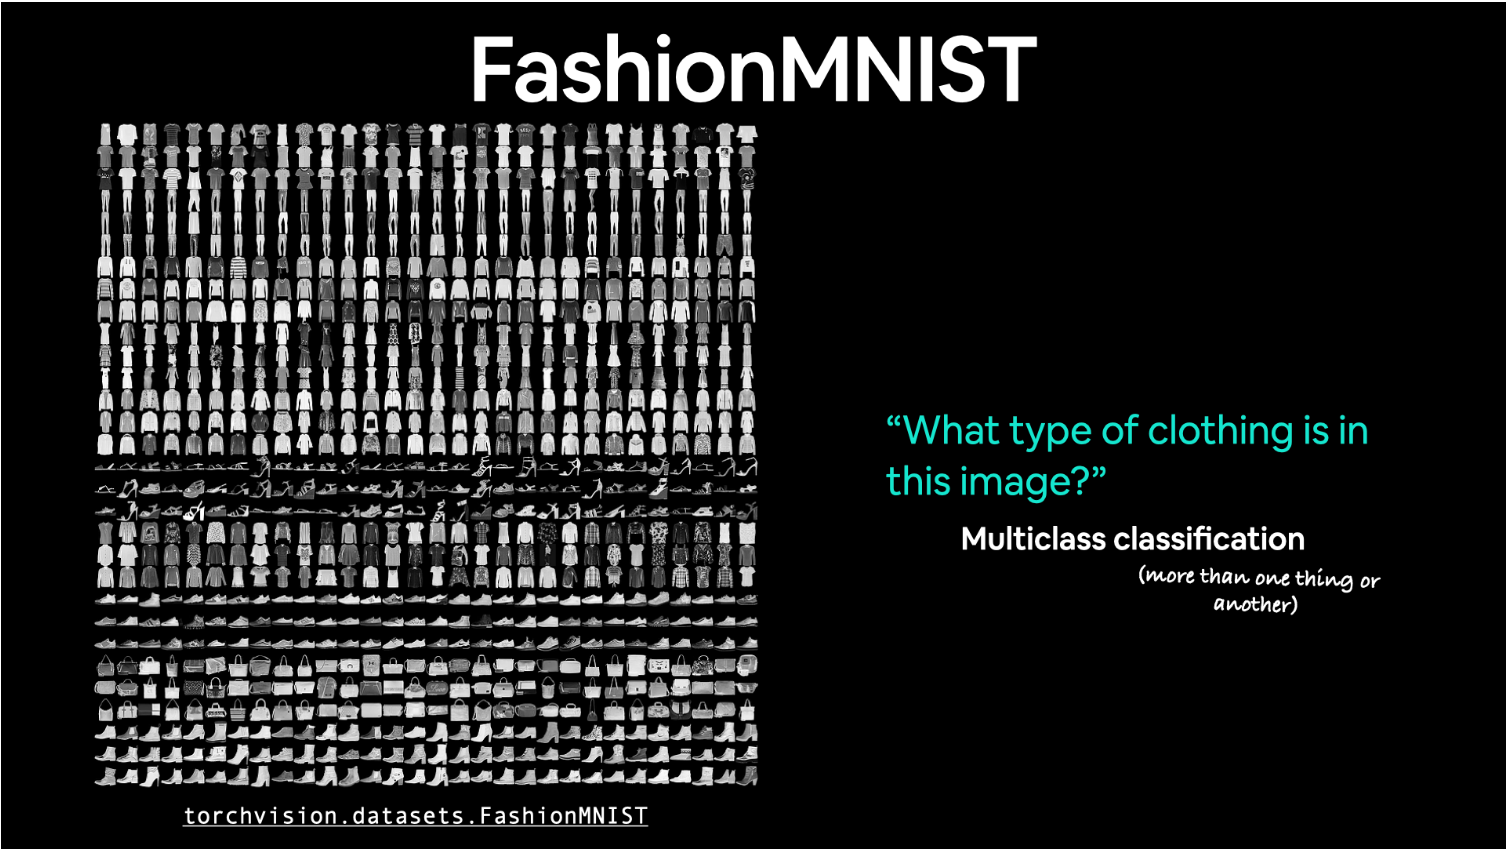

`torchvision.datasets` 包含了许多示例数据集，您可以用来练习编写计算机视觉代码。FashionMNIST 是其中一个数据集。由于它有 10 种不同的图像类别（不同类型的服装），因此这是一个多类分类问题。

稍后，我们将构建一个计算机视觉神经网络，以识别这些图像中不同风格的服装。

PyTorch 有一堆常见的计算机视觉数据集存储在 `torchvision.datasets` 中。

将 FashionMNIST 包含在 `torchvision.datasets.FashionMNIST()` 中。

要下载它，需要提供以下参数：
* `root: str` - 你想把数据下载到哪个文件夹？
* `train: Bool` - 你想要训练集还是测试集？
* `download: Bool` - 数据是否应该被下载？
* `transform: torchvision.transforms` - 你想对数据进行什么转换？
* `target_transform` - 如果你愿意，也可以转换目标（标签）。

`torchvision`中的许多其他数据集具有这些参数选项


In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="/home/icl/liang/pytorch_one_day/03_pytorch_computer_vision/data", # 存储数据集的文件夹地址
    train=True, # 下载训练集
    download=True, # 如果在文件夹中不存在，那就下载
    transform=ToTensor(), # 图像以PIL格式出现，我们想将其转换为Torch张量。
    target_transform=None # 这是用来转换标签的
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root = "/home/icl/liang/pytorch_one_day/03_pytorch_computer_vision/data",
    train=False, # 下载测试集
    download=True, 
    transform=ToTensor()
)

来看看训练数据的第一个样本。

In [3]:
# 看训练集第一个样本
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 计算机视觉模型的输入和输出形状
我们有一个大的值张量（图像），它导致一个单一的目标值（标签）。

看看图像的形状。

In [4]:
# 图像的形状是什么
image.shape

torch.Size([1, 28, 28])

图像张量的形状是 `[1, 28, 28]` 或更具体地说：

`[color_channels=1, height=28, width=28]`

color_channels意味着图像是灰度。

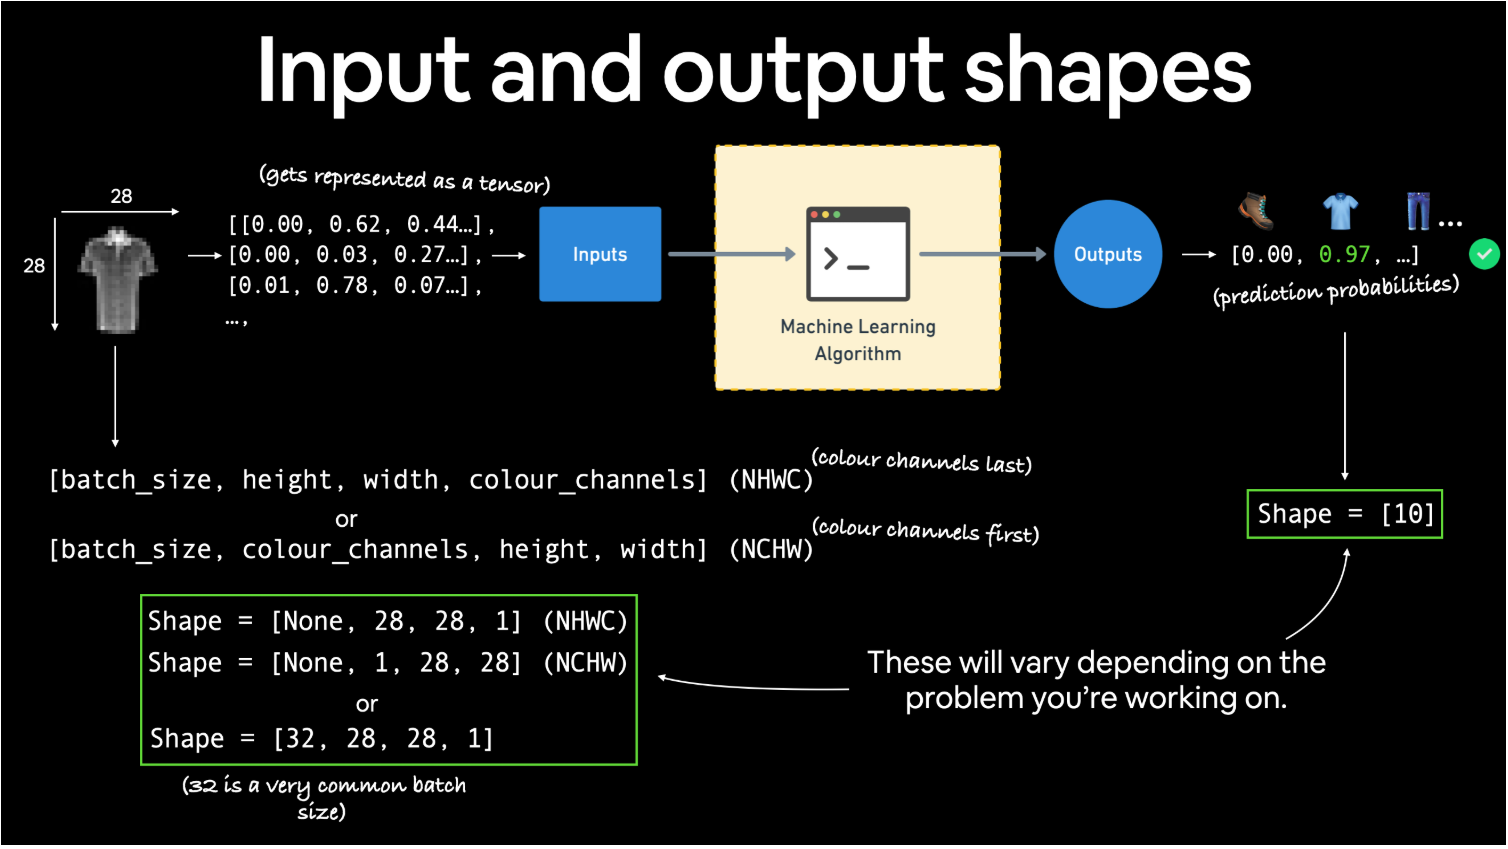

*各种问题将具有不同的输入和输出形状。但前提仍然是：将数据编码为数字，构建模型以在这些数字中寻找模式，将这些模式转换为有意义的东西。*

如果 `color_channels=3` ，图像以红、绿和蓝的像素值呈现（这也被称为 RGB 颜色模型）。

我们当前张量的顺序通常被称为 `CHW` （颜色通道、高度、宽度）。

注意：您还会看到 NCHW 和 NHWC 格式，其中 N 代表图像数量。例如，如果您有一个 batch_size=32 ，您的张量形状可能是 [32, 1, 28, 28] 。我们稍后会讨论批量大小。

PyTorch 通常将 `NCHW` （通道优先）作为许多操作的默认值。

然而，PyTorch 也解释说 `NHWC` （通道最后）表现更好，并被认为是最佳实践。

目前，由于我们的数据集和模型相对较小，这不会产生太大的差异。

但请记住，当您处理更大的图像数据集并使用卷积神经网络时（我们稍后会看到这些），会有很大差异。


让我们看看我们数据的更多形状。

In [5]:
# 有多少样本
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

所以我们有 60,000 个训练样本和 10,000 个测试样本。

下面看看有多少类

In [6]:
# 使用,classes属性找到有多少类
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

一共有10类

这意味着我们的问题是多类分类。

### 1.2 可视化数据

Image shape: torch.Size([1, 28, 28])


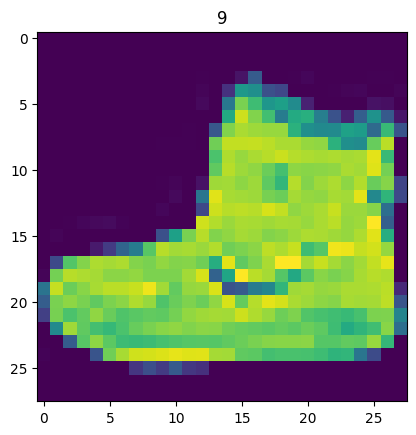

In [7]:
import matplotlib.pyplot as plt  # 导入Matplotlib库的pyplot模块，用于绘制图像
image, label  = train_data[0]    # 从训练数据集中获取第一个样本的图像和标签
print(f"Image shape: {image.shape}")  # 打印图像的形状，查看图像的维度信息
plt.imshow(image.squeeze())      # 使用Matplotlib的imshow函数显示图像，并通过squeeze去除不必要的维度
plt.title(label)                 # 设置图像的标题为标签，显示图像的类别信息
plt.show()                       # 显示图像（这行代码在某些环境中可能不需要，但为了完整性添加）


我们可以使用 `plt.imshow()` 的 `cmap` 参数将图像转换为灰度。

Text(0.5, 1.0, 'Ankle boot')

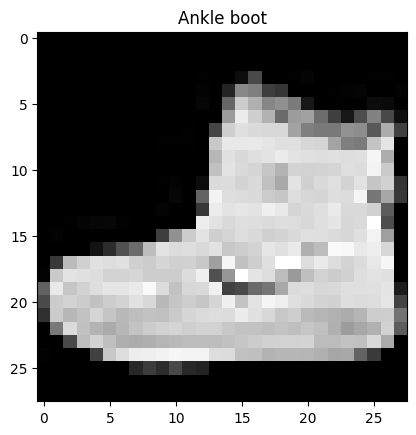

In [8]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

再来看几个


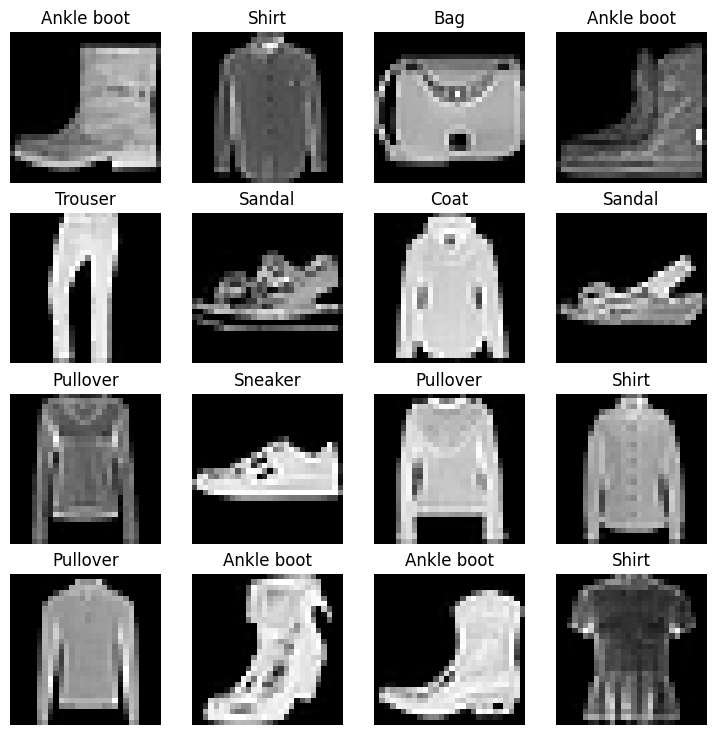

In [9]:
# 设置PyTorch的随机数生成器的种子为42，以确保代码的可重复性
torch.manual_seed(42)

# 创建一个新的图形窗口，大小为9英寸x9英寸
fig = plt.figure(figsize=(9, 9))

# 定义图形窗口中图像的行数和列数均为4
rows, cols = 4, 4

# 开始一个循环，循环变量i将从1递增到16（即rows * cols）
for i in range(1, rows * cols + 1):
    # 生成一个在0到train_data长度之间的随机整数，并转换为Python的标量整数
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    
    # 根据随机索引从训练数据集中选择对应的图像和标签
    img, label = train_data[random_idx]
    
    # 将当前子图添加到图形窗口中，位置为第i个
    fig.add_subplot(rows, cols, i)
    
    # 展示图像，使用灰度颜色映射，并去除图像张量中单一维度的条目
    plt.imshow(img.squeeze(), cmap="gray")
    
    # 为每个子图添加标题，标题是对应图像的类别名称
    plt.title(class_names[label])
    
    # 关闭坐标轴的显示，使图像更简洁，更容易查看
    plt.axis(False)


这个数据集看起来不太美观。

但是我们将要学习的构建模型的原则在广泛的计算机视觉问题中是相似的。

本质上，获取像素值并构建模型以寻找其中的模式，以便在未来的像素值上使用。

## 2. 准备数据加载器
现在我们有了一个准备好的数据集。

下一步是用 `torch.utils.data.DataLoader` 或 `DataLoader` 来准备它。

`DataLoader` 做你想的那样。它有助于将数据加载到模型中，用于训练和推理，它将一个大的 `Dataset` 转换为一个 `Python` 可迭代的小块。

这些较小的块称为批次或小批次，可以通过 `batch_size` 参数设置。

使用小批量（数据的小部分），每个周期内执行梯度下降的频率更高（每个小批量执行一次，而不是每个周期执行一次）。

好的批量大小是多少？

32 是一个解决相当多问题的好起点。

但由于这是一个可以设置的值（超参数），您可以尝试各种不同的值，尽管通常使用的值是 2 的幂（例如 32、64、128、256、512）。

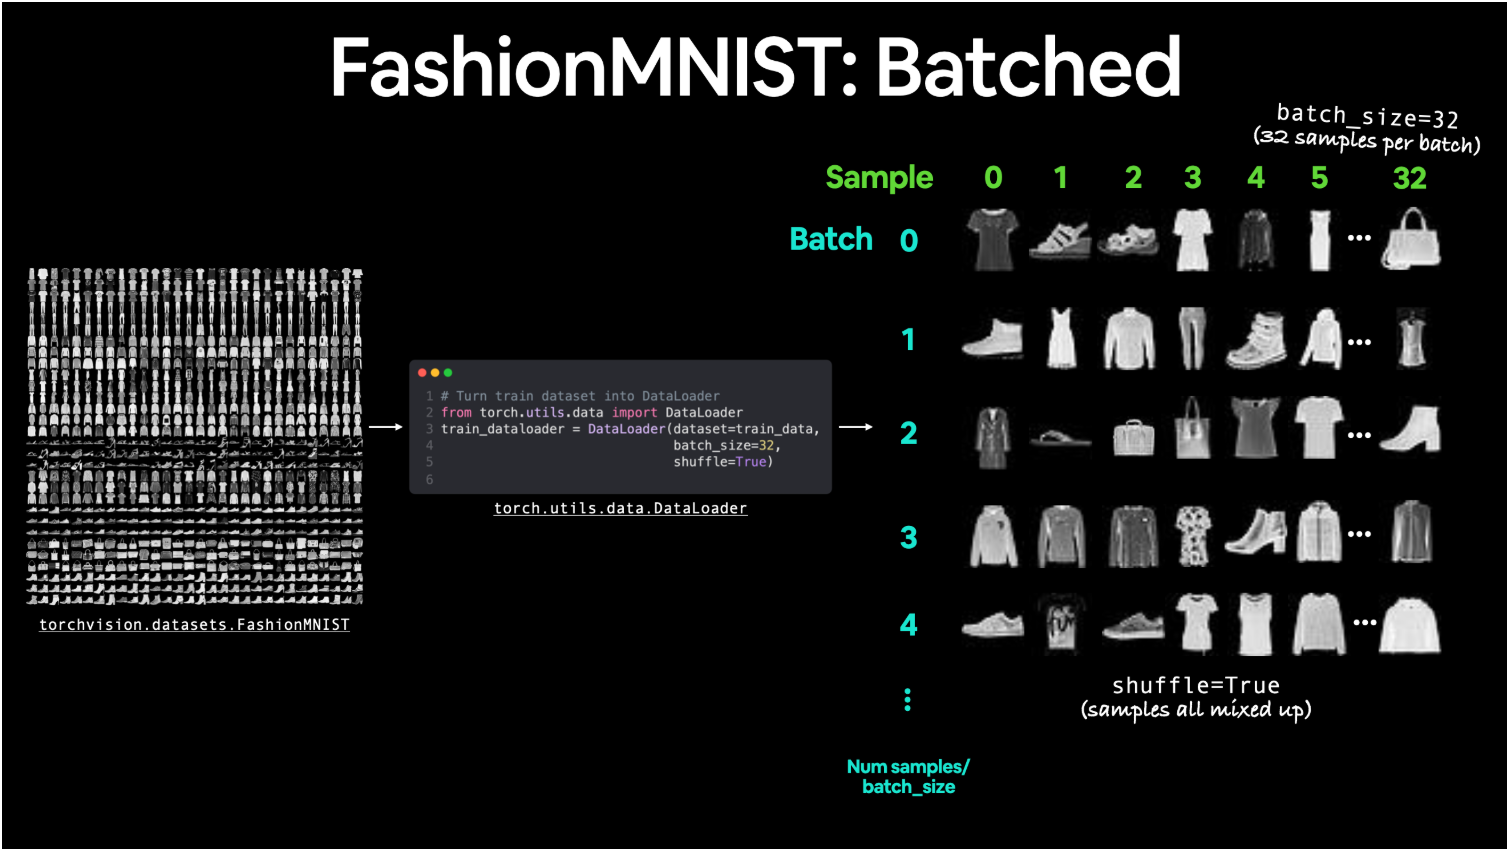

将 FashionMNIST 以批量大小 32 进行批处理，并开启洗牌。其他数据集也会进行类似的批处理，但会根据批量大小有所不同。

让我们为我们的训练集和测试集创建 `DataLoader` 。

In [10]:
from torch.utils.data import DataLoader

# 设置批量超参数
BATCH_SIZE = 32

# 将数据集转变成小批量
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE, # how many samples per batch? 
                              shuffle=True) # 每个周期打乱数据

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f56185ba900>, <torch.utils.data.dataloader.DataLoader object at 0x7f56137fc6e0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [11]:
# 查看训练数据加载器中的内容
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

我们可以通过检查一个样本来看到数据保持不变。

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


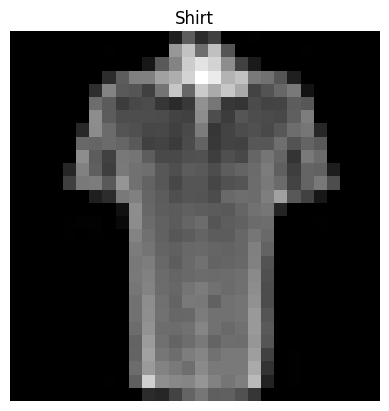

In [12]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3.模型0：建立基准模型
是时候通过子类化 `nn.Module` 来构建基线模型了。

基线模型是你能想象的最简单的模型之一。

您将基线作为起点，并尝试通过后续更复杂的模型来改进它。

我们的基线将由两个 `nn.Linear()` 层组成。

我们在前面的部分已经做过这个，但会有一个小的不同。

因为我们正在处理图像数据，所以我们将使用不同的层来开始。

这就是 `nn.Flatten()` 层。

`nn.Flatten()` 将张量的维度压缩为一个单一的向量。



In [13]:
# 创建一个扁平化层
flatten_model = nn.Flatten() # 所有神经网络模块都可以作为模型（可以进行前向传播）

# 摄取一个单一样本
x = train_features_batch[0]

# 展平这个扁平化层
output = flatten_model(x) # perform forward pass

# 打印发生了什么
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
# print(x)
# print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


`nn.Flatten()` 层将我们的形状从 `[color_channels, height, width]` 变为 `[color_channels, height*width]` 。

因为我们现在将像素数据从高度和宽度维度转换为一个长特征向量。

并且 `nn.Linear()` 层希望它们的输入以特征向量的形式存在。

让我们使用 `nn.Flatten()` 作为第一层来创建我们的第一个模型。

In [14]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # 神经网络喜欢以向量形式获取它们的输入。
            nn.Linear(in_features=input_shape, out_features=hidden_units),# n_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

现在实例化一个模型。

需要设置以下参数
* `input_shape=784` - 这就是你在模型中拥有的特征数量，在我们的例子中，它是目标图像中每个像素的一个特征（28 像素高 x 28 像素宽 = 784 个特征）。
* `hidden_units=10` - 隐藏层中的单元/神经元数量，这个数字可以是你想要的任何值，但为了保持模型小巧，我们将从 `10` 开始。
* `output_shape=len(class_names)` - 由于我们正在处理多类分类问题，因此我们需要为数据集中的每个类别设置一个输出神经元。

让我们创建一个模型的实例，并暂时发送到 CPU（我们很快会对在 CPU 上运行 model_0 与在 GPU 上运行类似模型进行小测试）。

In [15]:
torch.manual_seed(42)

# 需要设置模型与输入参数
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
                              hidden_units=10, # how many units in the hidden layer
                              output_shape=len(class_names) # one for every class
                              )

model_0.to("cpu") # keep model on CPU to begin with 

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 设置损失函数、优化器和评估指标
由于我们正在处理分类问题，让我们引入我们的 `helper_functions.py` 脚本，然后是我们在笔记本 02 中定义的 `accuracy_fn()` 。

In [16]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [17]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 创建一个函数来计时我们的实验。
制作一个计时函数来测量我们的模型在 CPU 上训练与使用 GPU 所需的时间。

我们将在 CPU 上训练这个模型，但下一个将在 GPU 上训练，看看会发生什么。

我们的定时函数将从 `Python timeit` 模块导入 `timeit.default_timer()` 函数。

In [18]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### 3.3 创建训练循环，并在数据批次上训练模型
看起来我们已经准备好了拼图的所有部分，一个计时器，一个损失函数，一个优化器，一个模型，最重要的是，一些数据。

现在让我们创建一个训练循环和一个测试循环，以训练和评估我们的模型。


我们将使用与之前的笔记本相同的步骤，不过由于我们的数据现在是批量形式，我们将添加 **另一个循环来遍历我们的数据批次**。

我们的数据批次包含在我们的 `DataLoader` 、 `train_dataloader` 和 `test_dataloader` 中，分别用于训练和测试数据的划分。

一个批次是 `BATCH_SIZE` 个 `X` （特征）和 `y` （标签），由于我们使用 `BATCH_SIZE=32` ，我们的批次包含 `32` 个图像和目标样本。

由于我们是在批量数据上进行计算，因此我们的损失和评估指标将按批次计算，而不是在整个数据集上计算。

这意味着我们必须将我们的损失和准确性值除以每个数据集相应数据加载器中的批次数。

In [19]:
# 导入tqdm以便可以显示进度条
from tqdm.auto import tqdm

# 设置种子和计时器
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# 设置轮次数，小一点，以便有更快的训练速度
epochs = 3

# 创建训练和测试循环
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n ----------")
    ### 训练ing
    train_loss = 0
    # 循环中的循环来遍历训练批次
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 前向传播
        y_pred = model_0(X)

        # 2. 计算损失（每个批次）
        loss = loss_fn(y_pred, y)
        train_loss += loss # 每个epoch累积计算损失

        # 3. 优化器零梯度化
        optimizer.zero_grad()

        # 4. 损失反向传播
        loss.backward()

        # 5. 优化器步骤
        optimizer.step()

        # 打印训练样本结果
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)

    ### Testing
    # 设置变量以累积加总损失和准确度
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. 前向过程
            test_pred = model_0(X)

            # 2. 计算损失（累加）
            test_loss += loss_fn(test_pred, y)

            # 3. 计算准确率 (累加)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


/home/icl/anaconda3/envs/lightning_liang/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 ----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:05<00:10,  5.31s/it]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
 ----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:10<00:05,  5.29s/it]


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
 ----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:15<00:00,  5.28s/it]


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 15.838 seconds


模型表现不错，训练也没有花很长时间。

下面来预测并获取模型0的结果


## 4. 进行预测并获取模型0的结果
由于我们将构建几个模型，编写一些代码以类似的方式评估它们是个好主意。

也就是说，让我们创建一个函数，该函数接受一个训练好的模型，一个 `DataLoader` ，一个损失函数和一个准确率函数。

该函数将使用模型对 `DataLoader` 中的数据进行预测，然后我们可以使用损失函数和准确度函数来评估这些预测。

In [20]:
import torch.utils


torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    返回一个字典，其中包含模型在 data_loader 上预测的结果。

    参数：
        model (torch.nn.Module)：一个能够在 data_loader 上进行预测的 PyTorch 模型。
        data_loader (torch.utils.data.DataLoader)：要进行预测的目标数据集。
        loss_fn (torch.nn.Module)：模型的损失函数。
        accuracy_fn：一个准确性函数，用于将模型的预测与真实标签进行比较。

    返回：
        (dict)：模型在 data_loader 上进行预测的结果。
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # 预测模型
            y_pred = model(X)

            # 按批次积累损失和准确率值
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1)) # 为了准确性，需要预测标签（logits -> pred_prob -> pred_labels）
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

# calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
                             loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

            

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

我们可以使用这个字典将基线模型的结果与其他模型进行比较。



## 5. 设置设备无关的代码(以便在有GPU时使用)
我们已经看到在 CPU 上训练一个 PyTorch 模型需要多长时间，使用 60,000 个样本。

现在让我们为我们的模型和数据设置一些与设备无关的代码，以便在可用时在 GPU 上运行。



In [21]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

再建一个模型

## 6. 模型1：通过非线性构建更好的模型
看到我们正在处理的数据，你认为需要非线性函数吗？

记住，线性意味着直线，非线性意味着非直线。

我们将通过重建一个类似于之前的模型来实现这一点，只不过这次我们将在每个线性层之间放置非线性函数 ( `nn.ReLU()` )。


In [22]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # 扁平化输入为单个向量
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)

In [23]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cuda', index=0)

### 6.1 设置损失函数、优化器和评估指标


In [24]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

### 6.2 函数化训练和测试循环
因为我们现在使用的是设备无关的代码，我们会确保在我们的特征 ( `X` ) 和目标 ( `y` ) 张量上调用 `.to(device)` 。

对于训练循环，我们将创建一个名为 `train_step()` 的函数，该函数接受一个模型，一个 `DataLoader` ，一个损失函数和一个优化器。

测试循环将类似，但它将被称为 `test_step()` ，并将接受一个模型，一个 `DataLoader` ，一个损失函数和一个评估函数。

In [25]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

计时，看看我们的代码在 GPU 上运行需要多长时间。

In [26]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%


 33%|███▎      | 1/3 [00:09<00:18,  9.31s/it]

Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%


 67%|██████▋   | 2/3 [00:18<00:09,  9.16s/it]

Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%


100%|██████████| 3/3 [00:27<00:00,  9.08s/it]

Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 27.249 seconds


模型训练完成了，但训练时间花得更长吗？

问题：“我使用了 GPU，但我的模型没有更快地训练，这可能是什么原因？”

答案：嗯，一个原因可能是因为你的数据集和模型都太小（就像我们正在使用的数据集和模型），使用 GPU 的好处被实际传输数据所需的时间所抵消。

在将数据从 CPU 内存（默认）复制到 GPU 内存时存在一个小瓶颈。

因此，对于较小的模型和数据集，CPU 可能实际上是进行计算的最佳选择。

但对于更大的数据集和模型，GPU 计算的速度通常远远超过将数据传输到那里所需的成本。

让我们使用我们的 `eval_model()` 函数评估我们训练的 `model_1` ，看看结果如何。

In [27]:
# torch.manual_seed(42)

# # Note: This will error due to `eval_model()` not using device agnostic code 
# model_1_results = eval_model(model=model_1, 
#     data_loader=test_dataloader,
#     loss_fn=loss_fn, 
#     accuracy_fn=accuracy_fn) 
# model_1_results 

看起来我们的 `eval_model()` 函数出错了，错误信息为：

    RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)

这是因为我们已经设置了数据和模型以使用设备无关的代码，但没有设置我们的评估函数。

我们通过将目标 `device` 参数传递给我们的 `eval_model()` 函数来解决这个问题怎么样？

In [28]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

In [29]:
# 检查model_0做一做对比
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

哇，在这种情况下，看来给我们的模型添加非线性使其表现比基线更差。

下面试试卷积神经网络吧！（CNN）

## 7. 模型2：构建卷积神经网络
是时候创建一个卷积神经网络（CNN 或 ConvNet）了。

CNN 以其在视觉数据中发现模式的能力而闻名。

既然我们处理的是视觉数据，让我们看看使用 CNN 模型是否能改善我们的基线。

我们将要使用的 CNN 模型被称为 TinyVGG，来自 CNN Explainer 网站。

它遵循卷积神经网络的典型结构：

`Input layer` -> [`Convolutional layer` -> `activation layer` -> `pooling layer`] -> `Output layer`

根据需求，[`Convolutional layer` -> `activation layer` -> `pooling layer`] 的内容可以被放大并重复多次。

这张表是选择使用哪个模型的一个很好的通用指南（尽管有例外）。

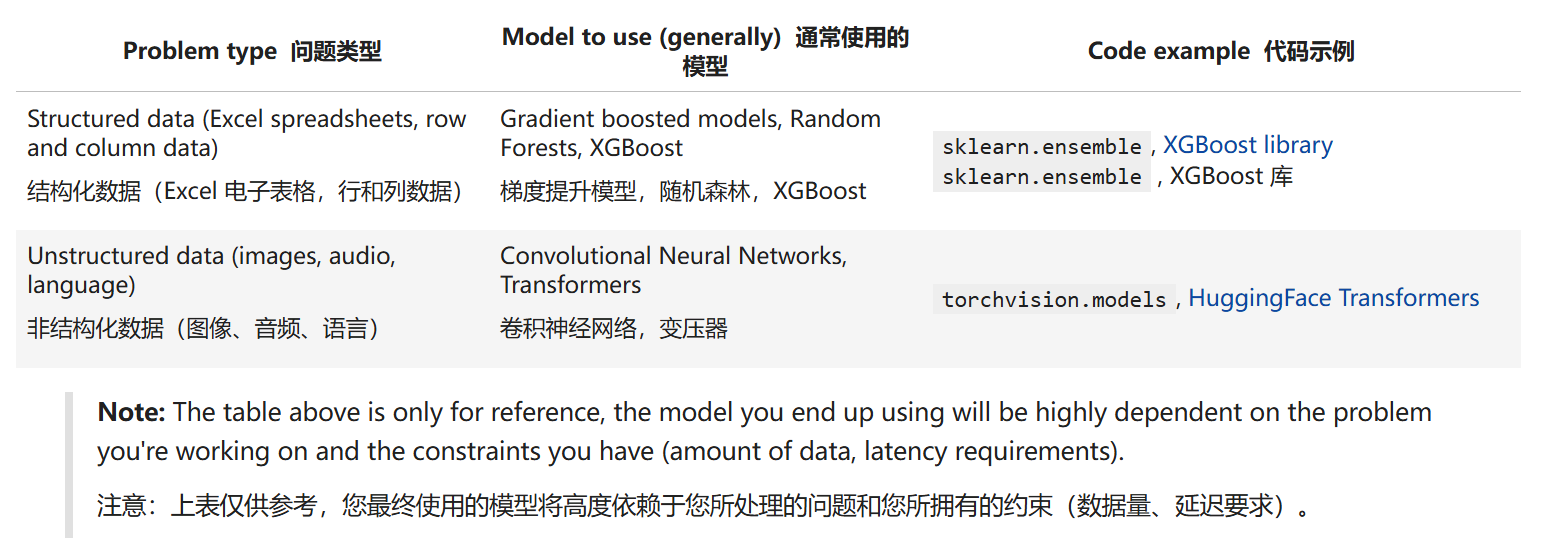

下图是CNN模型的示意图：

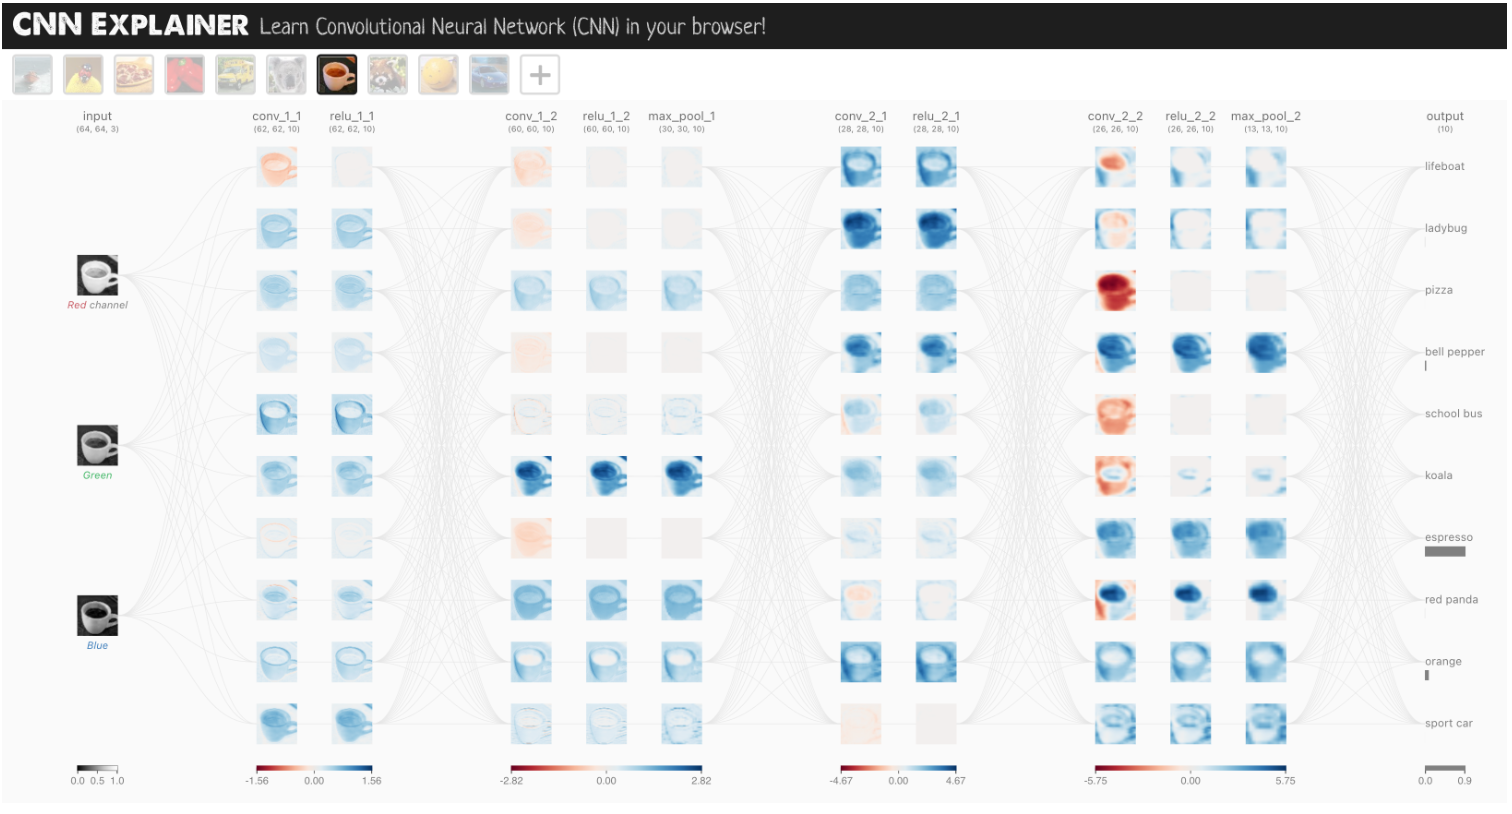

为此，我们将利用来自 `torch.nn` 的 `nn.Conv2d()` 和 `nn.MaxPool2d()` 层。

In [49]:
# 构建一个CNN模型
class FashionMNISTModelV2(nn.Module):
    """
    这是卷积神经网络的动态卷积的过程：
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2


FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 逐步执行 `nn.Conv2d` 

我们可以开始使用我们上面的模型，看看会发生什么，但我们先来逐步了解我们添加的两个新层：

* `nn.Conv2d()` ，也称为卷积层。
* `nn.MaxPool2d()` ，也称为最大池化层。

问题： `nn.Conv2d()` 中的“2d”代表什么？

2d 是指二维数据。也就是说，我们的图像有两个维度：高度和宽度。是的，还有颜色通道维度，但每个颜色通道维度也有两个维度：高度和宽度。


为了测试这些层，我们来创建一些玩具数据，就像在 CNN Explainer 中使用的数据一样。

In [50]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

让我们创建一个示例`nn.Conv2d()`，带各种参数：

* `in_channels (int)` - 输入图像中的通道数。
* `out_channels (int)` - 卷积产生的通道数量。
* `kernel_size` (`int` 或 `tuple`) - 卷积核/滤波器的大小。
* `stride` （整数或元组，可选）- 卷积核每次移动的步长。默认值：1。
* `padding` (`int`, `tuple`, `str`) - 添加到输入四个边的填充。默认值：0。


更改 `nn.Conv2d()` 层的超参数时发生的示例。

In [51]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
conv_layer(test_image)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

如果我们尝试传入单个图像，就会出现形状不匹配错误：

这是因为我们的 nn.Conv2d() 层期望输入一个大小为 (N, C, H, W) 或 [batch_size, color_channels, height, width] 的 4 维张量。

现在我们的单个图像 test_image 只有 [color_channels, height, width] 或 [3, 64, 64] 的形状。

我们可以通过使用 `test_image.unsqueeze(dim=0)` 为 N 添加一个额外的维度来修复单个图像。

In [52]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [53]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

嗯？注意我们形状发生了什么（与 CNN Explainer 上 TinyVGG 的第一层相同的形状），我们得到了不同的通道大小以及不同的像素大小。

如果我们改变了 conv_layer 的值会怎样？

In [54]:
torch.manual_seed(42)

# 创建一个新的卷积层，使用不同的值（可以尝试设置为您喜欢的任何值）
conv_layer_2 = nn.Conv2d(
    in_channels=3, # 与我们的输入图像具有相同的颜色通道数量
    out_channels=10, 
    kernel_size=(5, 5), # 内核通常是一个正方形，因此元组也可以工作
    stride=2,
    padding=0
)
# 通过新的 conv_layer_2 处理单张图像（这调用了 nn.Conv2d() 的 forward() 方法）
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

又有一个形状变化。

现在我们的图像形状为 [1, 10, 30, 30] （如果您使用不同的值，它将会不同）或 [batch_size=1, color_channels=10, height=30, width=30] 。

这里发生了什么？

在幕后，我们的 `nn.Conv2d()` 正在压缩存储在图像中的信息。

它通过对输入（我们的测试图像）与其内部参数进行操作来实现这一点。

这与我们一直在构建的其他神经网络的目标类似。

数据输入后，层会尝试更新其内部参数（模式），以降低损失函数，这得益于优化器的帮助。

唯一的区别在于不同层如何计算它们的参数更新，或者用 PyTorch 的术语来说，就是层 `forward()` 方法中存在的操作。

如果我们查看我们的 `conv_layer_2.state_dict()` ，我们会发现一个类似的权重和偏置设置，正如我们之前看到的。


In [55]:
# 检查conv—_layer_2 内部参数
print(conv_layer_2.state_dict())

OrderedDict({'weight': tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],


看看那个！一堆随机数字作为权重和偏置张量。

这些形状是通过我们在设置 `nn.Conv2d()` 时传递的输入来操控的。

让我们看看它们。

In [56]:
# 打印conv_layer_2的权重和偏置张量的形状
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


### 7.2 逐步执行 `nn.MaxPool2d()`
现在让我们看看当我们通过 `nn.MaxPool2d()` 移动数据时会发生什么。

In [57]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


注意到在 `nn.MaxPool2d()` 层内外发生的形状变化。

`nn.MaxPool2d()` 层的 `kernel_size` 将影响输出形状的大小。

在我们的案例中，形状从一个 62x62 图像变为 31x31 图像。

让我们看看这个在一个更小的张量上是如何工作的。



In [58]:
torch.manual_seed(42)

# 创建一个与我们的图像维度相似的随机张量
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# 创建一个最大池化层
max_pool_layer = nn.MaxPool2d(kernel_size=2) # 试着改变kernel_size看看会发生什么

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\n Max pool tensor: \n {max_pool_tensor}<- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

 Max pool tensor: 
 tensor([[[[0.3367]]]])<- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


注意 `random_tensor` 和 `max_pool_tensor` 之间的最后两个维度，它们从 `[2, 2]` 到 `[1, 1]` 。

本质上，它们被减半

对于 `nn.MaxPool2d()` 的不同 `kernel_size` 值，变化会有所不同。

还要注意， `max_pool_tensor` 中剩余的值是 `random_tensor` 中的最大值。

这里发生了什么？

这是神经网络另一个重要的组成部分。

本质上，神经网络中的每一层都在尝试将数据从高维空间压缩到低维空间。

换句话说，获取大量数字（原始数据）并学习这些数字中的模式，这些模式具有预测性，同时也比原始值的大小更小。

从人工智能的角度来看，您可以认为神经网络的整体目标是压缩信息。

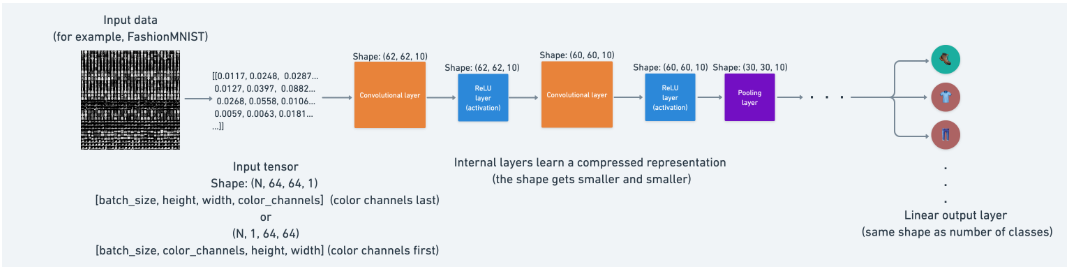

这意味着，从神经网络的角度来看，智能就是压缩。

这是使用 `nn.MaxPool2d()` 层的想法：从张量的一部分中取最大值，忽略其余部分。

本质上，降低张量的维度，同时仍然保留（希望）重要的信息部分。

对于 `nn.Conv2d()` 层也是同样的情况。

除了仅仅取最大值， nn.Conv2d() 对数据执行卷积操作（在 [CNN Explainer](https://poloclub.github.io/cnn-explainer/) 网页上查看此操作）。

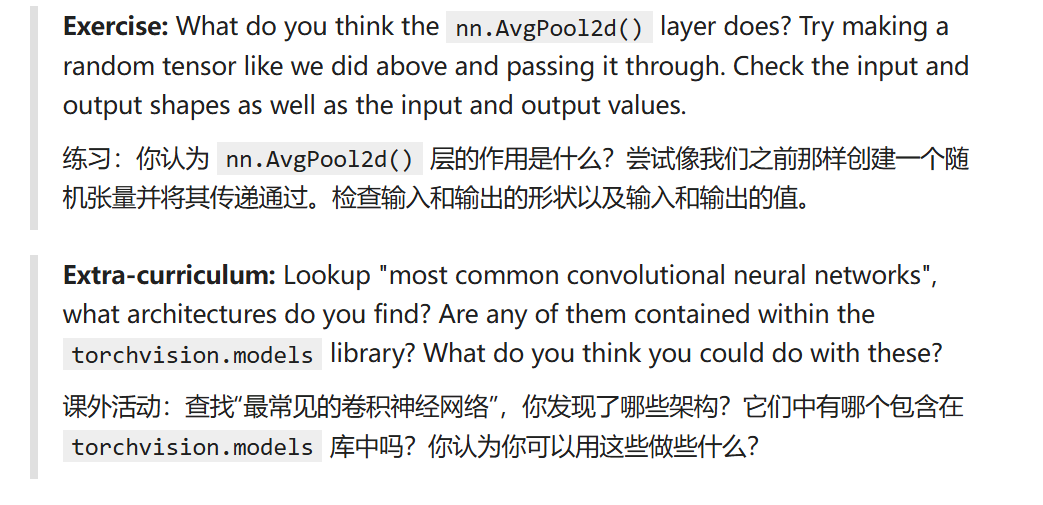

In [59]:
torch.manual_seed(42)

# 创建一个与我们的图像维度相似的随机张量
random_tensor_1 = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n {random_tensor_1}")
print(f"Random tensor shape: {random_tensor_1.shape}")

# 创建一个平均池化层
avg_pool_layer = nn.AvgPool2d(kernel_size=2) # 试着改变kernel_size看看会发生什么

# Pass the random tensor through the max pool layer
avg_pool_tensor = avg_pool_layer(random_tensor)
print(f"\n Avg pool tensor: \n {avg_pool_tensor}<- this is the average value from random_tensor")
print(f"Avg pool tensor shape: {avg_pool_tensor.shape}")

Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

 Avg pool tensor: 
 tensor([[[[0.2326]]]])<- this is the average value from random_tensor
Avg pool tensor shape: torch.Size([1, 1, 1, 1])


# 7.3 为`model_2`设置损失函数和优化器
我们已经足够深入了解我们第一个卷积神经网络中的各个层。

但请记住，如果还有什么不清楚的，尝试从小处着手。

选择模型的单层，传入一些数据并观察会发生什么。

现在是时候向前迈进，开始训练了！

让我们设置一个损失函数和一个优化器。

我们将像之前一样使用这些函数， `nn.CrossEntropyLoss()` 作为损失函数（因为我们正在处理多类分类数据）。

并使用 `torch.optim.SGD()` 作为优化器，以学习率 `0.1` 优化 `model_2.parameters()` 。

In [60]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

### 7.4 使用我们的训练和测试函数进行训练和测试 model_2
我们将使用之前创建的 train_step() 和 test_step() 函数。

我们还将测量时间，以便与我们的其他模型进行比较。

In [61]:
torch.manual_seed(42)

# 测量时间
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# 训练和测试模型
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------------")
    train_step(data_loader=train_dataloader,
               model=model_2,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(data_loader=test_dataloader,
              model=model_2,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------
Train loss: 0.59552 | Train accuracy: 78.58%


 33%|███▎      | 1/3 [00:12<00:24, 12.14s/it]

Test loss: 0.39832 | Test accuracy: 85.65%

Epoch: 1
--------------
Train loss: 0.35873 | Train accuracy: 87.13%


 67%|██████▋   | 2/3 [00:24<00:12, 12.23s/it]

Test loss: 0.35164 | Test accuracy: 87.38%

Epoch: 2
--------------
Train loss: 0.32194 | Train accuracy: 88.44%


100%|██████████| 3/3 [00:36<00:00, 12.21s/it]

Test loss: 0.31895 | Test accuracy: 88.60%

Train time on cuda: 36.641 seconds


看起来卷积层和最大池化层帮助提高了一点性能。

让我们用我们的 `eval_model()` 函数来评估 `model_2` 的结果。

In [62]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3189491629600525,
 'model_acc': 88.59824281150159}

## 8.比较模型结果和训练时间
我们训练了三个模型

1. `model_0` - 我们的基线模型，具有两个 `nn.Linear()` 层。

1. `model_1` - 与我们的基线模型相同的设置，只是在 `nn.Linear()` 层之间有 `nn.ReLU()` 层。

1. `model_2` - 我们第一个模仿 `CNN Explainer` 网站上 `TinyVGG` 架构的 `CNN` 模型。

这是机器学习中的一种常规做法。

构建多个模型并进行多次训练实验，以查看哪个表现最佳。

让我们将我们的模型结果字典合并成一个数据框并找出结果。

In [63]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

model_name  model_loss  model_acc
0  FashionMNISTModelV0    0.476639  83.426518
1  FashionMNISTModelV1    0.685001  75.019968
2  FashionMNISTModelV2    0.318949  88.598243

我们也可以添加训练时间值

In [64]:
# Add training times to results comparison
compare_results["training_time"] = [
    total_train_time_model_0,
    total_train_time_model_1,
    total_train_time_model_2
]
compare_results

model_name  model_loss  model_acc  training_time
0  FashionMNISTModelV0    0.476639  83.426518      15.838300
1  FashionMNISTModelV1    0.685001  75.019968      27.249111
2  FashionMNISTModelV2    0.318949  88.598243      36.641500

看起来我们的 `CNN` ( `FashionMNISTModelV2` )模型表现最好（损失最低，准确率最高），但训练时间最长。

我们的基线模型 ( `FashionMNISTModelV0` ) 的表现优于 `model_1` ( `FashionMNISTModelV1` )。

## 性能与速度的权衡
在机器学习中需要注意的一点是性能与速度之间的权衡。

通常，您会从更大、更复杂的模型中获得更好的性能（就像我们在 `model_2` 中所做的那样）。

然而，这种性能提升往往以牺牲训练速度和推理速度为代价。

来可视化一下

Text(0, 0.5, 'model')

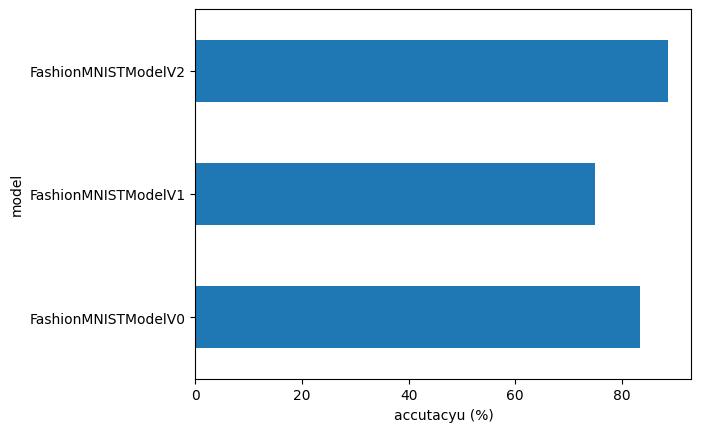

In [65]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accutacyu (%)")
plt.ylabel("model")

## 9. 使用最佳模型进行随机模拟并评估结果
好的，我们已经将我们的模型进行了比较，现在让我们进一步评估我们表现最好的模型`model_2`。

为此，让我们建立一个函数`make_predictions()`，在其中我们可以传递模型和一些数据供其进行预测。

In [71]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [72]:
import random 
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [73]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[7.6555e-07, 6.8661e-07, 9.3459e-07, 4.0577e-07, 8.5274e-08, 9.9971e-01,
         4.9115e-07, 1.6099e-05, 4.1487e-05, 2.2467e-04],
        [1.3164e-01, 5.9742e-01, 2.0981e-03, 1.2835e-01, 8.9501e-02, 3.1059e-04,
         4.9818e-02, 4.8373e-04, 1.1467e-04, 2.6309e-04]])

现在我们可以使用我们的 `make_predictions()` 函数在 `test_samples` 上进行预测。


In [74]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[7.6555e-07, 6.8661e-07, 9.3459e-07, 4.0577e-07, 8.5274e-08, 9.9971e-01,
         4.9115e-07, 1.6099e-05, 4.1487e-05, 2.2467e-04],
        [1.3164e-01, 5.9742e-01, 2.0981e-03, 1.2835e-01, 8.9501e-02, 3.1059e-04,
         4.9818e-02, 4.8373e-04, 1.1467e-04, 2.6309e-04]])

现在我们可以通过对 `torch.softmax()` 激活函数的输出取 `torch.argmax()` ，将预测概率转换为预测标签。

In [75]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

In [76]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 2, 3, 0, 4, 7, 1]))

可视化图像数据，进行进一步检测

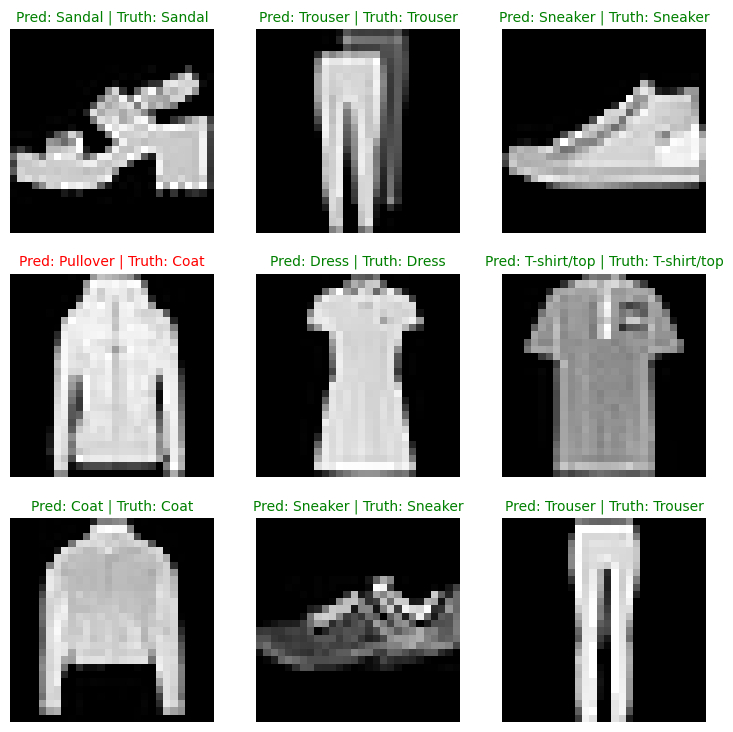

In [77]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

看起来结果不错

## 10. 制作混淆矩阵以进行进一步的预测评估
我们可以使用许多不同的评估指标来解决分类问题。

最直观之一的就是混淆矩阵。

混淆矩阵显示了你的分类模型在预测和真是标签之间的混淆的地方。

要制作混淆矩阵，将经过三个步骤：

1. 使用我们训练的模型进行预测， `model_2` （混淆矩阵将预测与真实标签进行比较）。

1. 使用 `torchmetrics.ConfusionMatrix` 制作混淆矩阵。

1. 使用 `mlxtend.plotting.plot_confusion_matrix()` 绘制混淆矩阵。

让我们开始使用我们训练好的模型进行预测。

In [79]:
# Import tqdm progress bar
from tqdm.auto import tqdm

# 1. make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
        # Send data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model_2(X)
        # Turn predictions from logits -> prediction probabilities -> predictions labels
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:00<00:00, 471.99it/s]


现在我们有了预测，让我们进行步骤 2 和 3：2. 使用 `torchmetrics.ConfusionMatrix` 创建混淆矩阵。3. 使用 `mlxtend.plotting.plot_confusion_matrix()` 绘制混淆矩阵。

In [80]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    %pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.3


In [81]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.3


下面来制作混淆矩阵。

首先，我们将创建一个`torchmetrics.ConfusionMatrix`实例，通过设置`num_classes = len(class_names)`来告诉它我们正在处理多少个类别。

然后我们通过将传递我们的实例模型的预测（ `preds=y_pred_tensor` ）和目标（ `target=test_data.targets` ）来创建一个混淆矩阵（张量格式）。

最后，我们可以使用 `mlxtend.plotting`中的`plot_confusion_matrix()`函数绘制我们的混淆矩阵。

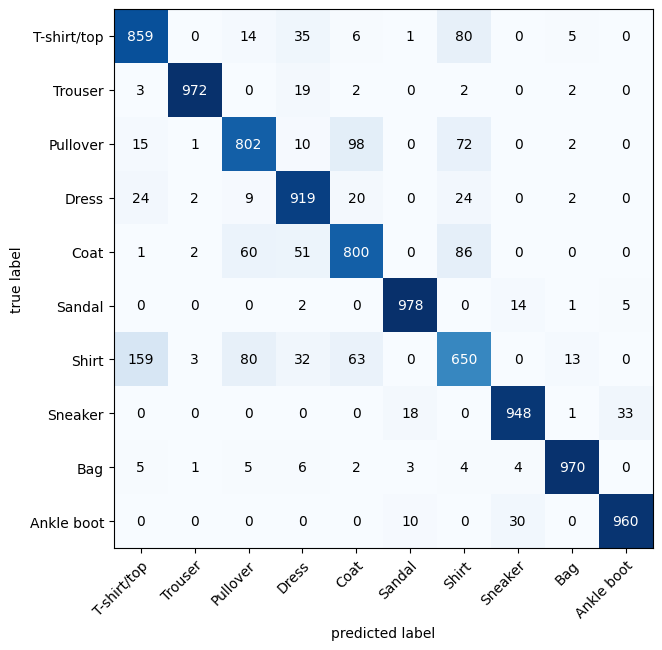

In [82]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds = y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
)

我们可以看到我们的模型表现得相当不错，因为大多数黑色方块位于从左上角到右下角的对角线上（理想模型只会在这些方块中有值，其他地方都是 0）。

模型在相似类别上最容易“混淆”，例如将实际标记为“衬衫”的图像预测为“套头衫”。

对于实际标记为“T-shirt/top”的类别，预测“Shirt”也是如此。

这些信息通常比单一的准确性指标有帮助，因为它告诉我们模型在哪些方面出错。



## 11. 保存和加载模型

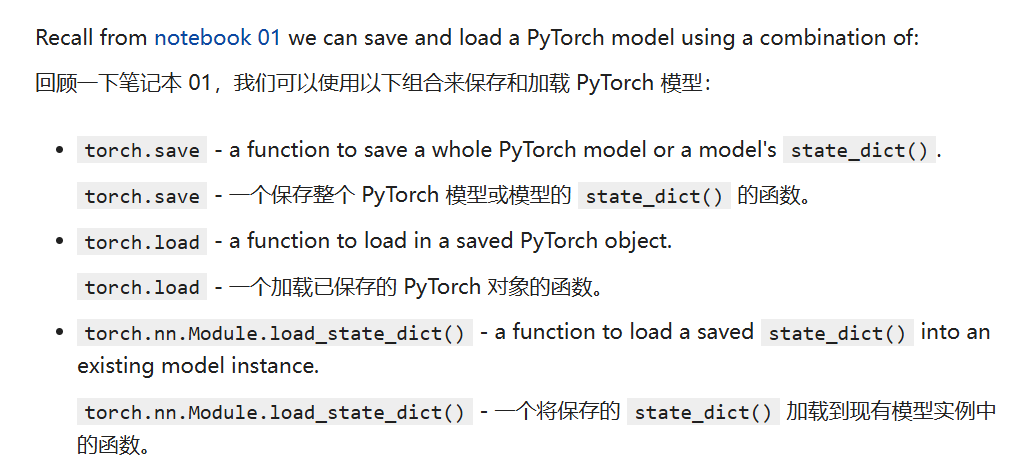

现在，让我们保存我们的 `model_2` 的 `state_dict()` ，然后再加载它并进行评估，以确保保存和加载正确进行。

In [83]:
from pathlib import Path

MODEL_PATH = Path("/home/icl/liang/pytorch_one_day/models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Creat model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state _dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: /home/icl/liang/pytorch_one_day/models/03_pytorch_computer_vision_model_2.pth


现在我们有了一个保存的模型 `state_dict()` ，我们可以使用 `load_state_dict()` 和 `torch.load()` 的组合将其加载回来。

由于我们正在使用 `load_state_dict()` ，我们需要创建一个新的 `FashionMNISTModelV2()` 实例，使用与我们保存的模型 `state_dict()` 相同的输入参数。

In [84]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version\
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                     hidden_units=10, 
                                     output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU

loaded_model_2 = loaded_model_2.to(device)

现在我们有了一个加载的模型，我们可以用 `eval_model()` 进行评估，以确保它的参数在保存之前与 `model_2` 类似。

In [85]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3189491629600525,
 'model_acc': 88.59824281150159}

In [86]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3189491629600525,
 'model_acc': 88.59824281150159}

我们可以通过 `torch.isclose()` 来判断两个张量是否接近，并通过参数 `atol` （绝对容忍度）和 `rtol` （相对容忍度）传入接近的容忍水平。

如果我们的模型结果接近， `torch.isclose()` 的输出应该为真。

In [87]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)